Goal: Create an image classifier for different flowers using the fastAI library.
A seperate imagescraper was created to create the datasets. 
Created three different datasets. Rose, sunflower and daisies via imgscraper.

In [15]:
# DataLoaders
# Load and transfers data from sources into multiple objects (e.g. train and valid) into the machine learning model.
# original dataset had grizzly, black, teddy for different bears type.

In [16]:
from fastbook import *
from fastai.vision.widgets import *

In [17]:
path = Path(r"C:\Users\Work\Documents\GitHub\DS\Imgscraper\flowers")

In [18]:
flowers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # What type of data we are working with
    get_items=get_image_files, # how to get the list of items
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # split our training and validation sets randomly
    get_y=parent_label, # how to label these items -> gets the name of the folder a file is in
    item_tfms=Resize(128) # resizing image
)

In [19]:
dls = flowers.dataloaders(path) # Tells the dataloader where the path is.

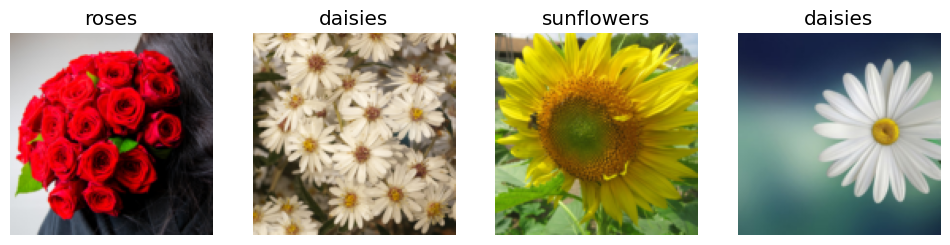

In [20]:
dls.valid.show_batch(max_n=4, nrows=1)

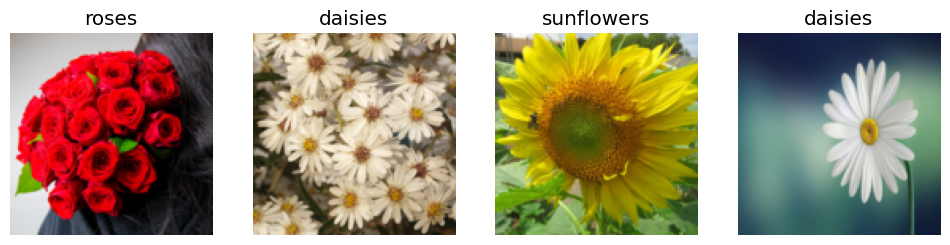

In [21]:
# Making sure that the resizing is proper. 
# Sometimes the resizing from the original results in the images being cropped to fit the square.
flowers = flowers.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = flowers.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [25]:
"""
Randomly resize and select different part of each image so that the model can learn to focus 
on and recognise different features in an image.
"""
flowers = flowers.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = flowers.dataloaders(path)
# dls.valid.show_batch(max_n=4, nrows=1, unique=True) # viewing training does not work due to a bug.

In [26]:
# Data Augmentation
flowers = flowers.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = flowers.dataloaders(path)
# dls.train.show_batch(max_n=8, nrows=2, unique=True) # viewing training does not work due to a bug.

In [27]:
# Now it's time to train the model.
flowers = flowers.new(
    item_tfms=Resize(128, ResizeMethod.Squish) # Using this instead of aug_transforms because I can't get it to work.
) # There seems to be a bug.
dls = flowers.dataloaders(path)

# Create the learner
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,nan,1.203022,0.384615,00:00


epoch,train_loss,valid_loss,error_rate,time
0,nan,1.203022,0.384615,00:00
1,nan,1.203022,0.384615,00:00
2,nan,1.203022,0.384615,00:00
3,nan,1.203022,0.384615,00:00


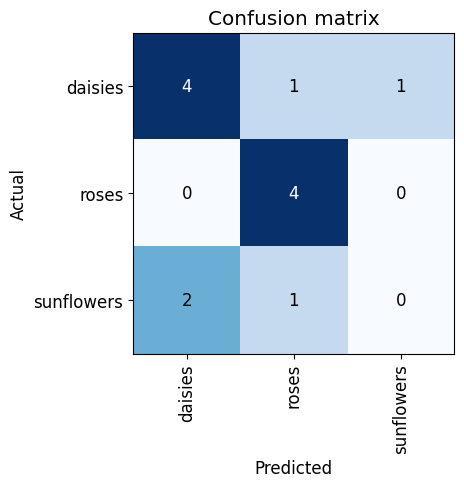

In [28]:
# Confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

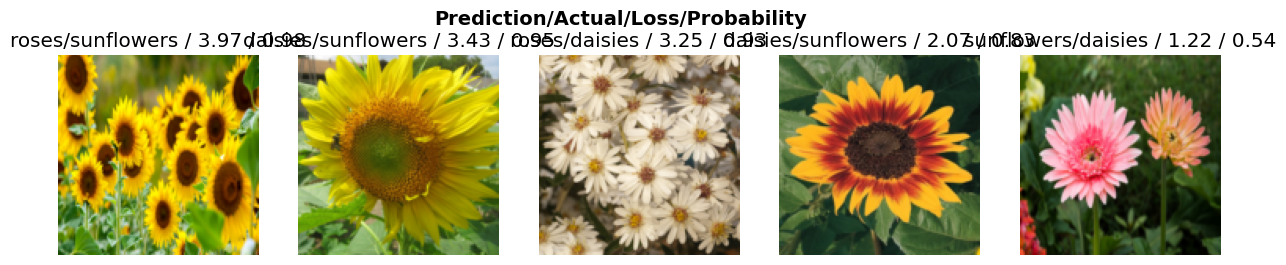

In [29]:
interp.plot_top_losses(5, nrows=1)

In [31]:
# Helps clean up the training data
cleaner = ImageClassifierCleaner(learn)
cleaner

In [32]:
learn.export()

In [37]:
# exports the model
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [39]:
# inference - getting the predictions
learn_inf = load_learner(path/'export.pkl')

In [43]:
# predicting a selected image that I have provided.
learn_inf.predict(r'C:\Users\Work\Documents\GitHub\DS\Imgscraper\flowers\test\01testimg.jpg')

# prediction was correct!

('roses', tensor(1), tensor([6.6796e-04, 9.9699e-01, 2.3385e-03]))

In [44]:
# inference of the different categories.
learn_inf.dls.vocab

['daisies', 'roses', 'sunflowers']

In [49]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [52]:
btn_upload = SimpleNamespace(data = [r'C:\Users\Work\Documents\GitHub\DS\Imgscraper\flowers\test\01testimg.jpg'])

In [53]:
img = PILImage.create(btn_upload.data[-1])

In [54]:
# Output widget
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [57]:
# prediction
pred,pred_idx,probs = learn_inf.predict(img)

In [58]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: roses; Probability: 0.9970')

In [59]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [61]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)
     

In [62]:
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()
     


In [64]:
VBox([widgets.Label('Upload your desired flower image'), 
      btn_upload, btn_run, out_pl, lbl_pred])